# Prediction of wine quality using Machine learning models 

In [1]:
#importing the required libraries for loading and visualizing the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#i have imported the Red-wine dataset 
df=pd.read_csv("K:\Semester-4\Datasets\winequality-red.csv")

In [3]:
#the first five rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#basic description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#statistical description 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#checking for null values ...luckily we dont have to deal with null values in this dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

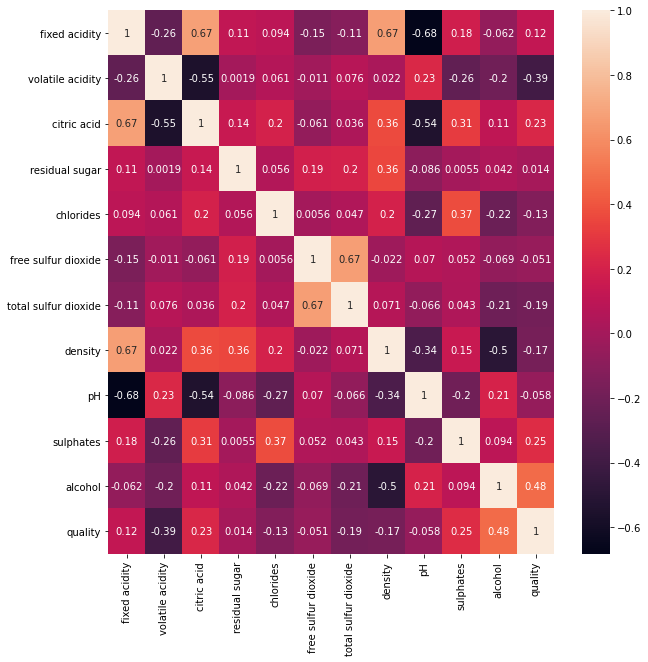

In [7]:
#lets check for the correlation between the features
corr = df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

C:\Users\akank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

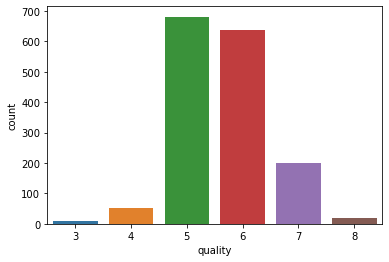

In [9]:
#visualizing the total number of counts  
sns.countplot(df['quality'])

In [11]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [16]:
#splitting the dataset for train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 45)

In [17]:
print(X_train.shape)
print(X_test.shape)

(1439, 11)
(160, 11)


# Applying Machine learning models to the dataset 

In [18]:
##linear Regression

from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test) 

lrscore=regressor.score(X_test,y_test)
print(lrscore)

0.34714943116563834


In [19]:
##lasso regression

from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.001)
lassoReg.fit(X_train,y_train)

y_predl = lassoReg.predict(X_test)

lsscore = lassoReg.score(X_test,y_test)
print(lsscore)

0.33845675123609686


In [20]:
##support vector machine

from sklearn.svm import SVC

svm= SVC(kernel = 'rbf', random_state = 1)
svm.fit(X_train, y_train)
y_preds = svm.predict(X_test)
svmscore=svm.score(X_test,y_test)
print(svmscore)

0.4625


In [21]:
##decision tree classffier

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train, y_train)

y_predd =dtc.predict(X_test)
dtscore=dtc.score(X_test,y_test)
print(dtscore)

0.64375


In [22]:
##naive bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

y_predn = nb.predict(X_test)
nbscore=nb.score(X_test,y_test)
print(nbscore)

0.55625


In [30]:
##adaboost

from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=100,learning_rate=1,random_state=0)
abc.fit(X_train, y_train)

y_preda = abc.predict(X_test)
abscore=abc.score(X_test,y_test)
print(abscore)

0.55625


In [29]:
##random forest

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=600)
rf.fit(X_train,y_train)

y_predr = rf.predict(X_test)
rfscore=rf.score(X_test,y_test)
print(rfscore)

0.73125


In [31]:
r1=["Linear Regression","Lasso Regression","AdaBoost","Random Forest","SVM","Decision Tree","Naive Bayes"]
r2=[lrscore,lsscore,abscore,rfscore,svmscore,dtscore,nbscore]
scores=pd.DataFrame(list(zip(r1,r2)),columns =['ML models', 'Scores'])
scores.sort_values(by=['Scores'],ascending=False)

,ML models,Scores
3,Random Forest,0.731250
5,Decision Tree,0.643750
2,AdaBoost,0.556250
6,Naive Bayes,0.556250
4,SVM,0.462500
0,Linear Regression,0.347149
1,Lasso Regression,0.338457


From the above table, we can see using Random Forest model we got highest prediction score for the dataset.